In [6]:
import pandas as pd
import matplotlib.pyplot as plt

def load_data(file_path):
    """
    Load data from an Excel file.
    
    Parameters:
    file_path (str): The path to the Excel file.
    
    Returns:
    pd.DataFrame: The loaded data.
    """
    return pd.read_excel(file_path, index_col=0)

def find_top_20_droughts(df,n=20):
    """
    Find the top 20 longest droughts.
    
    Parameters:
    df (pd.DataFrame): The input data.
    
    Returns:
    pd.DataFrame: The top 20 longest droughts.
    """
    top_20_durations = df['duration'].nlargest(n).unique()
    top_20_droughts_df = df[df['duration'].isin(top_20_durations)].sort_values(by='duration', ascending=False)
    return top_20_droughts_df

def get_drought_period(drought_df):
    """
    Get the start and end date of the longest drought period.
    
    Parameters:
    drought_df (pd.DataFrame): The drought data.
    
    Returns:
    tuple: Start and end date of the drought period.
    """
    start_date = drought_df.iloc[0]['Date']
    end_date = drought_df.iloc[-1]['Date']
    return start_date, end_date

def plot_wind_generation(drought_df, start_date, end_date):
    """
    Plot the expected and actual wind generation output during the drought periods.
    
    Parameters:
    drought_df (pd.DataFrame): The drought data.
    start_date (str): Start date of the drought period.
    end_date (str): End date of the drought period.
    """
    values1 = drought_df['Average_all'].values
    values2 = drought_df['6 Gen MW Wind'].values


    fig, ax = plt.subplots()

    ax.plot(values1, label='Expected Wind Generation Output', color='green')
    ax.plot(values2, label='Actual Wind Generation Output', color='red')

    ax.set_xlabel('Duration (hrs)')
    ax.set_ylabel('Wind Generation Output')
    ax.set_title(f'Wind Drought Analysis from {start_date} to {end_date}')

    ax.legend()
    plt.show()

def plot_20_wind_generation(drought_df, start_date, end_date,indices=20):
    """
    Plot the expected and actual wind generation output during the drought periods.
    
    Parameters:
    drought_df (pd.DataFrame): The drought data.
    start_date (str): Start date of the drought period.
    end_date (str): End date of the drought period.
    """
    values1 = drought_df['Average_all'].values[:indices]
    values2 = drought_df['6 Gen MW Wind'].values[:indices]
    indices = range(indices)

    fig, ax = plt.subplots()

    ax.plot(indices, values1, label='Expected Wind Generation Output', color='green')
    ax.plot(indices, values2, label='Actual Wind Generation Output', color='red')

    # Add dots on each value
    ax.scatter(indices, values1, color='red', s=50)
    ax.scatter(indices, values2, color='black', s=50)

    ax.set_xlabel('Duration (hrs)')
    ax.set_ylabel('Wind Generation Output')
    ax.set_title(f'Wind Drought Analysis from {start_date} to {end_date}')

    ax.legend()
    plt.show()



def plot_drought_pie_chart(drought_df,n=20):
    """
    Plot a pie chart of the top 20 drought durations.
    
    Parameters:
    drought_df (pd.DataFrame): The drought data.
    """
    plt.figure(figsize=(8, 8))
    plt.pie(drought_df['duration'].head(n), labels=drought_df['Date'].astype(str).head(n), autopct='%1.1f%%')
    plt.title('Distribution of Top 20 Drought Durations')
    plt.show()

def plot_drought_histogram(drought_df,n=20):
    """
    Plot a histogram of the top 20 drought durations.
    
    Parameters:
    drought_df (pd.DataFrame): The drought data.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(drought_df['duration'].head(n), bins=10, color='purple', edgecolor='black')
    plt.xlabel('Duration (hrs)')
    plt.ylabel('Frequency')
    plt.title('Histogram of Top 20 Drought Durations')
    plt.show()

def plot_drought_scatter(drought_df):
    """
    Plot a scatter plot of the wind generation output during the drought periods.
    
    Parameters:
    drought_df (pd.DataFrame): The drought data.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(drought_df['6 Gen MW Wind'], drought_df['Average_all'], color='orange')
    plt.xlabel('Actual Wind Generation Output')
    plt.ylabel('Expected Wind Generation Output')
    plt.title('Scatter Plot of Wind Generation Output During Droughts')
    plt.show()

In [8]:
# Main code
file_path = 'CA_final_data.xlsx'
df = load_data(file_path)
top_20_droughts_df = find_top_20_droughts(df)
n = 20
# Display the top n droughts
top_20_droughts_df.head(n)

,Date,Time,6 Gen MW Wind,Average,Datetime,DayHour,Average_all,Average drought,event_start,duration
227158,11/29/1965,4:00:00 PM,188.98,188.98,1965-11-29 16:00:00,333-16,806.248929,1,True,269
227343,12/7/1965,9:00:00 AM,5.48,5.48,1965-12-07 09:00:00,341-09,621.038452,1,False,269
227329,12/6/1965,7:00:00 PM,0.07,0.07,1965-12-06 19:00:00,340-19,562.522143,1,False,269
227330,12/6/1965,8:00:00 PM,0.13,0.13,1965-12-06 20:00:00,340-20,591.761548,1,False,269
227331,12/6/1965,9:00:00 PM,0.13,0.13,1965-12-06 21:00:00,340-21,614.453214,1,False,269
227332,12/6/1965,10:00:00 PM,1.71,1.71,1965-12-06 22:00:00,340-22,604.894881,1,False,269
227333,12/6/1965,11:00:00 PM,2.14,2.14,1965-12-06 23:00:00,340-23,637.002738,1,False,269
227334,12/7/1965,12:00:00 AM,2.67,2.67,1965-12-07 00:00:00,341-00,670.645714,1,False,269
227335,12/7/1965,1:00:00 AM,2.12,2.12,1965-12-07 01:00:00,341-01,679.868333,1,False,269
227336,12/7/1965,2:00:00 AM,2.10,2.10,1965-12-07 02:00:00,341-02,686.604167,1,False,269


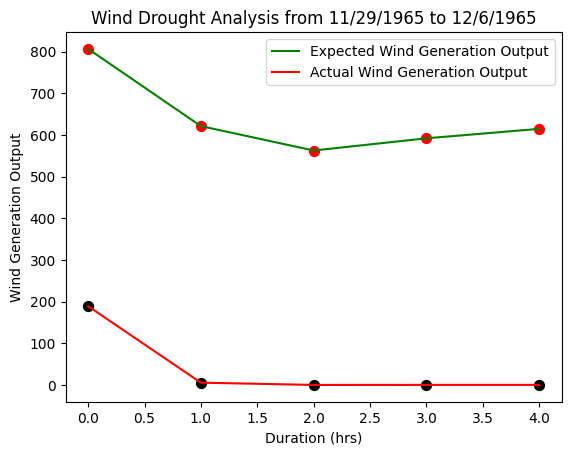

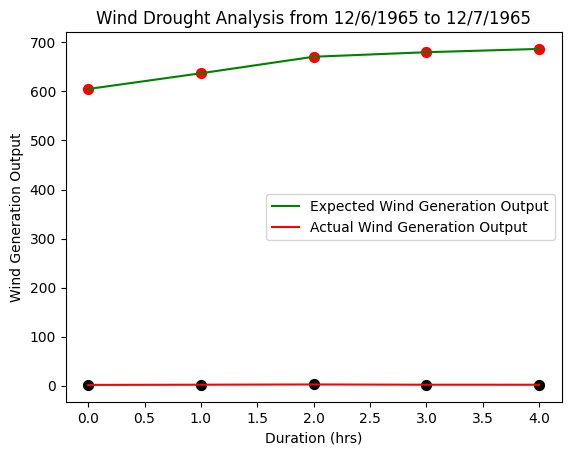

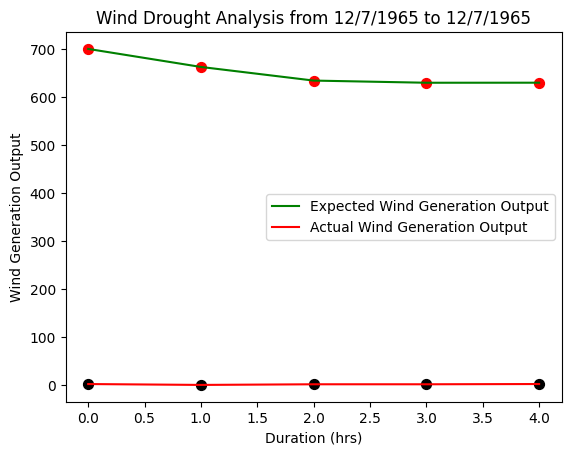

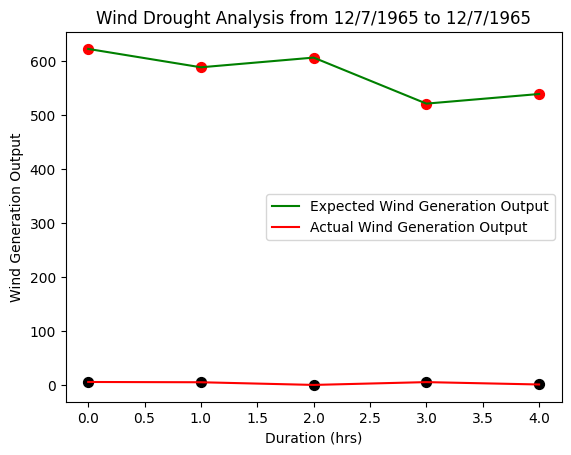

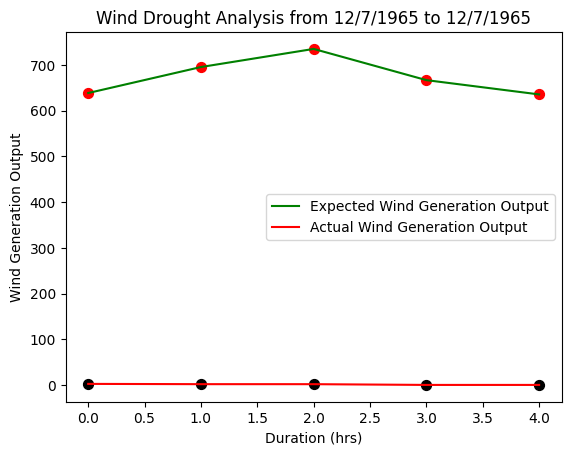

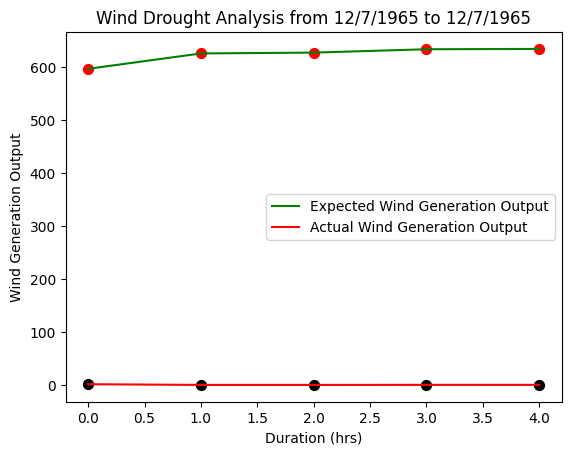

In [9]:
# Split the data into four groups, each containing five droughts
drought_groups = [top_20_droughts_df.head(n).iloc[i:i+5] for i in range(0, len(top_20_droughts_df.head(n)), 5)]
for item in drought_groups:
    start_date, end_date = get_drought_period(item)
    plot_20_wind_generation(item, start_date, end_date,indices=5)

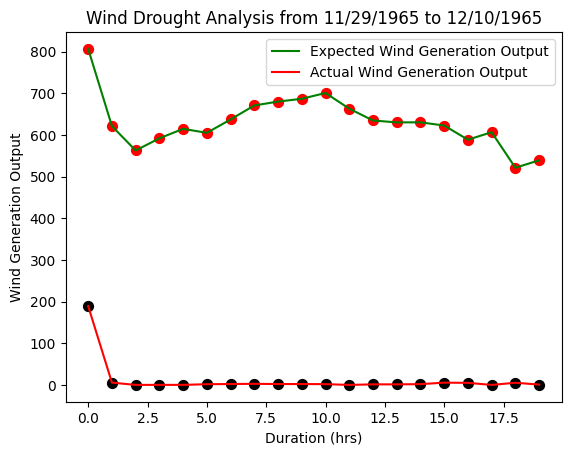

In [33]:
# Get drought period
start_date, end_date = get_drought_period(top_20_droughts_df)

plot_20_wind_generation(top_20_droughts_df, start_date, end_date)

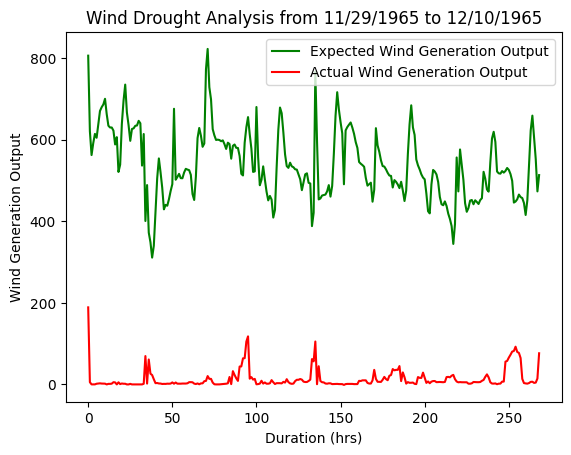

In [34]:
# Plot charts
plot_wind_generation(top_20_droughts_df, start_date, end_date)

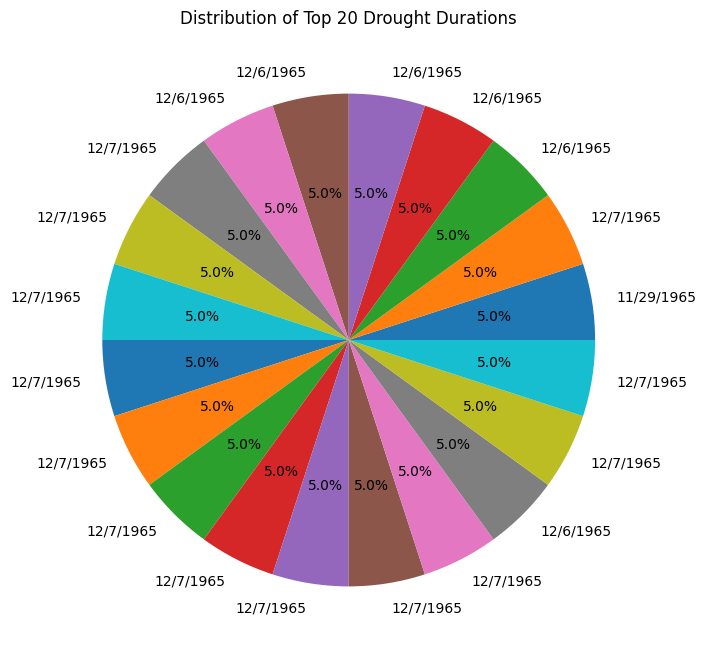

In [6]:
plot_drought_pie_chart(top_20_droughts_df)

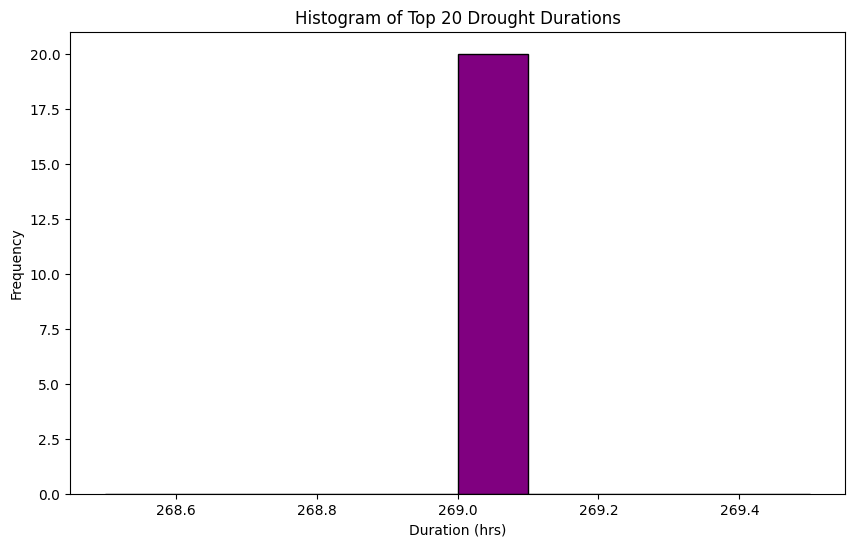

In [10]:
plot_drought_histogram(top_20_droughts_df,n=20)

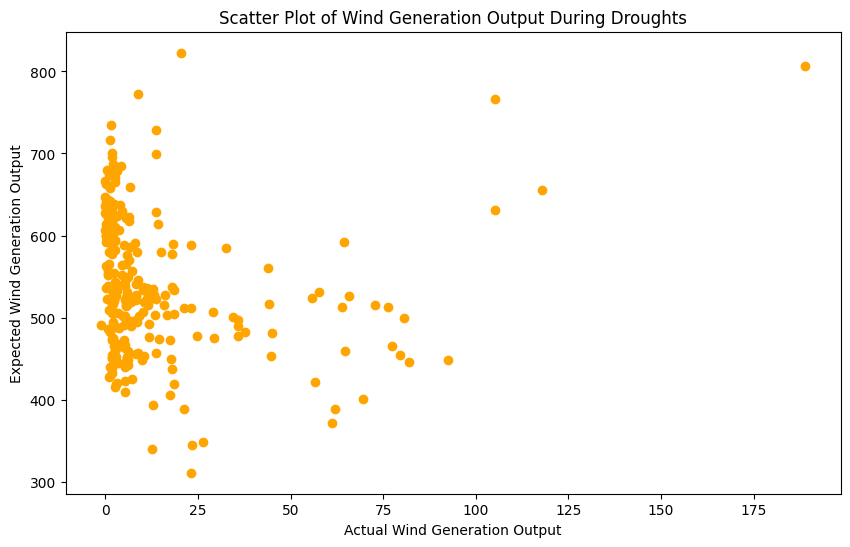

In [12]:
plot_drought_scatter(top_20_droughts_df)